In [123]:
import re
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [124]:
#load the dataset
tweets_dataframe = pd.read_csv("train.csv")
#Remove the id, keyword and location column 
tweets_dataframe = tweets_dataframe.iloc[:, 3:]
tweets_dataframe.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [125]:
#Check if the dataset has any null values
print("The text column has " + str(tweets_dataframe['text'].isna().sum()) + " null values")
print("The target column has " + str(tweets_dataframe['target'].isna().sum()) + " null values")

The text column has 0 null values
The target column has 0 null values


There are 4342 samples of tweets that don't report any disasters
There are 3271 samples of tweets that report valid disasters


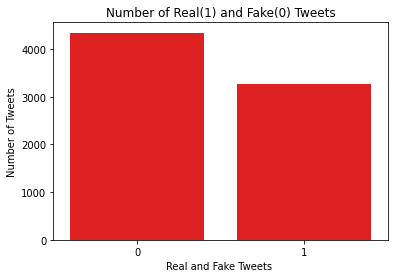

In [126]:
#Check the distribution of the data
df = tweets_dataframe.groupby("target").count()
x = df.index
y = df["text"]

sns.barplot(x = x, y = y , color = "Red")
plt.xlabel("Real and Fake Tweets ")
plt.ylabel("Number of Tweets")
plt.title("Number of Real(1) and Fake(0) Tweets")


print("There are " + str(y[0]) + " samples of tweets that don't report any disasters")
print("There are " + str(y[1]) + " samples of tweets that report valid disasters") 

In [127]:
#Clean the data 

#funtion for removing any links to websites and remove numbers 
def remove_link_num(text):
    url = re.compile(r'http\S+|www\S+|@\S+|#\S+|[0-9]+')
    return url.sub(r'',text)

#function removing punctuations
def remove_punctuations(text):
    result = re.sub(r'[^\w\s]', '', text)
    return result

tweets_dataframe['text'] = tweets_dataframe['text'].apply(lambda x: remove_punctuations(x))
tweets_dataframe['text'] = tweets_dataframe['text'].apply(lambda x: remove_link_num(x))

tweets_dataframe.head()

,text,target
0,Our Deeds are the Reason of this earthquake Ma...,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in...,1
4,Just got sent this photo from Ruby Alaska as s...,1


In [128]:
#function to tokenize the text
def tokenize(text):
    result = word_tokenize(text)
    return result

#function to remove stopwords
def remove_stopwords(tokenized_sentence):
    result = [word for word in tokenized_sentence if word not in stopwords.words()]
    return result

#function to lemmatize the sentences in the text
def lemmatize_text(cleaned_tokenized_sentence):
    lemmatizer = WordNetLemmatizer()
    result = [lemmatizer.lemmatize((word)) for word in cleaned_tokenized_sentence]
    return result 

#function to stem the sentences in the text
def stem_text(cleaned_tokenized_sentence):
    stemmer = PorterStemmer()
    result = [stemmer.stem(word) for word in cleaned_tokenized_sentence]
    return result

In [129]:
#a different way to tokenize and padd the text
text_data = tweets_dataframe.text
labels = tweets_dataframe.target
tokenizer = Tokenizer(num_words = 1000 , oov_token = "<OUT>")
tokenizer.fit_on_texts(text_data)

tokenized_sentences = tokenizer.texts_to_sequences(text_data)
padded_sentences = pad_sequences(tokenized_sentences , truncating = 'post' , maxlen = 25)

In [130]:
with open('dataset.pickle', 'wb') as f:
    pickle.dump(padded_sentences , f)
    
with open('labels.pickle', 'wb') as f:
    pickle.dump(labels , f)
    
with open('tokenizer.pickle' , 'wb') as f:
    pickle.dump(tokenizer , f)